In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pandas import DataFrame

In [6]:
# Load saved DCCRN model info and test set results
res = pd.read_csv('saved_models/dccrn_results.csv')

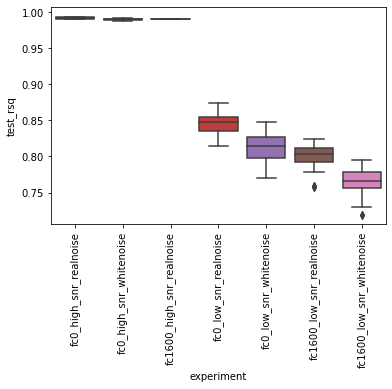

In [3]:
# Distribution of test R-squared results across hyperparameters
sns.boxplot(data=res.query('high_snr_data == False'), x='experiment', y='test_rsq')
plt.xticks(rotation = 90)
plt.show()

In [4]:
# Best hyperparameters performance for low SNR
best_rsq = res.query('high_snr_data == False').drop(labels='test_mse', axis=1).groupby(by=['experiment'],as_index=False).apply(DataFrame.nlargest, n=1, columns='test_rsq')


cshow = ['experiment','test_rsq','batch_size','lr','batch_size','win','rnn_units','masking_mode']
display(best_rsq[cshow])

,,experiment,test_rsq,batch_size,lr,batch_size,win,rnn_units,masking_mode
0,118,fc0_low_snr_realnoise,0.874596,128,0.0003,128,64,128,E
1,208,fc0_low_snr_whitenoise,0.847294,128,0.0003,128,128,128,E
2,374,fc1600_low_snr_realnoise,0.823984,256,0.0003,256,64,128,R
3,320,fc1600_low_snr_whitenoise,0.795749,256,0.0003,256,32,128,R
